## ODE for a double pendulum

We want to find the family of ODEs that describe the motion of a double pendulum.  This means we have two arms. The first arm is connected to a bearing, say, lying flat along a wall.  So the first arm has an angle parameter that gives the arm's angle 

<div style="display: inline-block; margin-right: 12px; margin-left: 100px">
<img src="doublepen.gif" width="300" height="300" class="alignleft"/> </div>

i.e. $m_1$ hangs on the first arm with angle $\theta_1$ from vertical.  $m_2$ hangs off the second arm, connected at the base of the first arm, with angle $\theta_2$ from vertical (you could use the angle from the first arm if you prefer).  Let's say the first arm has length $r_1$ and the second arm has length $r_2$.  We call the coefficients of friction at the top of the first arm $k_1$ and at the top of the second arm $k_2$.  We are assuming all the mass is concentrated at the base of the two arms, i.e. the arms themselves are massless. 

The ODEs of motion are rather tedious to work out (typically one sees this in a 3rd year classical mechanics course, for the purpose of this course it would be fine if you grabbed this information from the web).  We compute them using Lagrangian mechanics below. 

In [1]:
import sympy as sp

m1,m2,k1,k2,r1,r2,g,t = sp.symbols("m_1 m_2 k_1 k_2 r_1 r_2 g t")
t1 = sp.Function("θ_1")(t)
t2 = sp.Function("θ_2")(t)
w1 = sp.Derivative(t1, t)
w2 = sp.Derivative(t2, t)
ti = sp.Function("θ_i")(t)
wi = sp.Function("w_i")(t)

R = sp.Function("R")
L = sp.Function("L")

T, V = sp.symbols("T V")

Teq = sp.Eq(T, (1/2)*m1*r1**2*(w1**2) + m2*r1*r2*w1*w2*sp.cos(t1-t2)+(1/2)*m2*r1**2*(w1**2)+\
      (1/2)*m2*r2**2*(w2**2))
Veq = sp.Eq(V, -m1*g*r1*sp.cos(t1)-m2*g*(r1*sp.cos(t1)+r2*sp.cos(t2)))
Req = sp.Eq(R, (1/2)*k1*w1**2 + (1/2)*k2*(w2-w1)**2)
# L = T - V
Leq = sp.Eq(L, Teq.args[1] - Veq.args[1])
print(" *** The set-up *** ")
print("Kinetic Energy")
sp.pprint(Teq)
print("\nPotential Energy")
sp.pprint(Veq)
print("\nRayleigh dissipation term")
sp.pprint(Req)
print("\nLagrangian L = T - V")
sp.pprint(Leq)
print("\nLagrange's Equations of Motion")
sp.pprint( sp.Eq(sp.Derivative(L, wi, t) - sp.Derivative(L,ti) +\
           sp.Derivative(R, wi), 0))
print("for i=1,2")

 *** The set-up *** 
Kinetic Energy
                          2                         2                         
             2 ⎛d        ⎞             2 ⎛d        ⎞                          
T = 0.5⋅m₁⋅r₁ ⋅⎜──(θ₁(t))⎟  + 0.5⋅m₂⋅r₁ ⋅⎜──(θ₁(t))⎟  + m₂⋅r₁⋅r₂⋅cos(θ₁(t) - θ
               ⎝dt       ⎠               ⎝dt       ⎠                          

                                                  2
      d         d                    2 ⎛d        ⎞ 
₂(t))⋅──(θ₁(t))⋅──(θ₂(t)) + 0.5⋅m₂⋅r₂ ⋅⎜──(θ₂(t))⎟ 
      dt        dt                     ⎝dt       ⎠ 

Potential Energy
V = -g⋅m₁⋅r₁⋅cos(θ₁(t)) - g⋅m₂⋅(r₁⋅cos(θ₁(t)) + r₂⋅cos(θ₂(t)))

Rayleigh dissipation term
                      2                                   2
           ⎛d        ⎞           ⎛  d           d        ⎞ 
R = 0.5⋅k₁⋅⎜──(θ₁(t))⎟  + 0.5⋅k₂⋅⎜- ──(θ₁(t)) + ──(θ₂(t))⎟ 
           ⎝dt       ⎠           ⎝  dt          dt       ⎠ 

Lagrangian L = T - V
                                                                     

In [2]:
## Computing with the values of L and R. 
LEM1 = sp.Eq(sp.Derivative(Leq.args[1], w1, t).doit() - \
             sp.Derivative(Leq.args[1], t1).doit() + \
             sp.Derivative(Req.args[1], w1).doit(), 0).simplify()
LEM2 = sp.Eq(sp.Derivative(Leq.args[1], w2, t).doit() - \
             sp.Derivative(Leq.args[1], t2).doit() + \
             sp.Derivative(Req.args[1], w2).doit(), 0).simplify()
#sp.pprint(LEM1)
#sp.pprint(LEM2)
#look good.

In [3]:
print("Lagrange's Equations of Motion: ")
print("Solving for θ''_1, θ''_2")
SOL = sp.solve((LEM1, LEM2), sp.Derivative(t1, t, 2), sp.Derivative(t2, t, 2))
#sp.pprint(SOL)
#looks good.

Lagrange's Equations of Motion: 
Solving for θ''_1, θ''_2


In [4]:
T1pp = SOL[sp.Derivative(t1,t,2)].simplify()
T2pp = SOL[sp.Derivative(t2,t,2)].simplify()
#print("theta_1'' is...")
#sp.pprint(T1pp)
#print("theta_2'' is...")
#sp.pprint(T2pp)

In [5]:
## As a test, let's see if dE/dt = -2R. 
## this is how Lagrangians work for "conservative" frictional
## forces like this. 
test = sp.Derivative(Teq.args[1]+Veq.args[1], t).doit().doit()
test = test.simplify()
test = test.xreplace({sp.Derivative(t1,t,2): T1pp, sp.Derivative(t2,t,2): T2pp})
test = test.simplify()
sp.pprint( (test+2*Req.args[1]).simplify() )

## Okay, we're good!

0


In [6]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## let's cast the formulas for t1'' and t2'' above into callable functions. 
## we need to get rid of the sp.Function expressions to pass these expressions
## to ufuncify
from sympy.utilities.autowrap import ufuncify
## before we cast T1pp and T2pp let's simplify them a bit. 
w1, w2, t1, t2 = sp.symbols("w_1 w_2 θ_1 θ_2")
xT1pp = T1pp
xT1pp = xT1pp.xreplace({sp.Derivative(sp.Function("θ_1")(t),t): w1, sp.Derivative(sp.Function("θ_2")(t),t): w2} )
xT1pp = xT1pp.xreplace({sp.Function("θ_1")(t): t1, sp.Function("θ_2")(t) : t2})
#sp.pprint(xT1pp)

xT2pp = T2pp
xT2pp = xT2pp.xreplace({sp.Derivative(sp.Function("θ_1")(t),t): w1, sp.Derivative(sp.Function("θ_2")(t),t): w2} )
xT2pp = xT2pp.xreplace({sp.Function("θ_1")(t): t1, sp.Function("θ_2")(t) : t2})
#sp.pprint(xT2pp)

t1,t2 = sp.symbols("t1 t2")
xT1pp = xT1pp.xreplace({sp.Symbol("θ_1") : t1, sp.Symbol("θ_2") : t2})
xT2pp = xT2pp.xreplace({sp.Symbol("θ_1") : t1, sp.Symbol("θ_2") : t2})
#sp.pprint(xT1pp)
#sp.pprint(xT2pp)


In [7]:
## be careful -- ufuncify does not like unicode characters!
t1pp = ufuncify([r1,r2, m1,m2, k1,k2, t1,t2, w1,w2, g], xT1pp )
t2pp = ufuncify([r1,r2, m1,m2, k1,k2, t1,t2, w1,w2, g], xT2pp )

In [8]:
## this is our ODE.  It takes as input theta1, theta2, theta1', and theta2' and
## returns theta1'' and theta2''. It also needs r1,r2, m1,m2, k1,k2. 
## It incodes the above. 
def theODE(t1, t2, t1p, t2p, r1,r2, m1,m2, k1,k2, g):
    return float(t1pp(r1,r2, m1,m2, k1,k2, t1,t2, t1p, t2p, g)),  \
           float(t2pp(r1,r2, m1,m2, k1,k2, t1,t2, t1p, t2p, g))
## okay, seeing a divergence here! 
#print(theODE(2,-1,1,4,1,1,1,1,0.2,0.1,9))

In [9]:
## Let's similarly cast V, T and R. 
V = Veq.args[1]
R = Req.args[1]
T = Teq.args[1]
Vp = V
Vp = Vp.xreplace({sp.Function("θ_1")(t): t1, sp.Function("θ_2")(t) : t2})
Rp = R
Rp = Rp.xreplace({sp.Derivative(sp.Function("θ_1")(t),t): w1, sp.Derivative(sp.Function("θ_2")(t),t): w2} )
Rp = Rp.xreplace({sp.Function("θ_1")(t): t1, sp.Function("θ_2")(t) : t2})
Tp = T
Tp = Tp.xreplace({sp.Derivative(sp.Function("θ_1")(t),t): w1, sp.Derivative(sp.Function("θ_2")(t),t): w2} )
Tp = Tp.xreplace({sp.Function("θ_1")(t): t1, sp.Function("θ_2")(t) : t2})
#sp.pprint(Vp)
## let's further normalize Vp to be zero at the stable fixed point
Vp = Vp + g*m1*r1 + g*m2*(r1+r2)
sp.pprint(Vp)
Vc = ufuncify([m1,m2, r1,r2, t1,t2, g], Vp)
Rc = ufuncify([k1,k2, w1,w2],Rp)
Tc = ufuncify([m1,m2, r1,r2, t1,t2, w1,w2], Tp)

-g⋅m₁⋅r₁⋅cos(t₁) + g⋅m₁⋅r₁ + g⋅m₂⋅(r₁ + r₂) - g⋅m₂⋅(r₁⋅cos(t₁) + r₂⋅cos(t₂))


In [10]:
## Let's also compute the gradient of E = T + V wrt t1,t2,t1p,t2p
## and cast it to a callable function
Ep = V + T
Ep = Ep.xreplace({sp.Derivative(sp.Function("θ_1")(t),t): w1, 
                  sp.Derivative(sp.Function("θ_2")(t),t): w2} )
Ep = Ep.xreplace({sp.Function("θ_1")(t): t1, sp.Function("θ_2")(t) : t2})
sp.pprint(Ep)
gradEv = [sp.Derivative(Ep, t1).doit(), sp.Derivative(Ep, t2).doit(), \
          sp.Derivative(Ep, w1).doit(), sp.Derivative(Ep, w2).doit()]
sp.pprint(gradEv)
gradEc = [ufuncify([m1,m2, r1,r2, t1,t2, w1,w2, g], gradEv[i]) for i in range(4)]

                                                             2   2            
-g⋅m₁⋅r₁⋅cos(t₁) - g⋅m₂⋅(r₁⋅cos(t₁) + r₂⋅cos(t₂)) + 0.5⋅m₁⋅r₁ ⋅w₁  + 0.5⋅m₂⋅r₁

2   2                                          2   2
 ⋅w₁  + m₂⋅r₁⋅r₂⋅w₁⋅w₂⋅cos(t₁ - t₂) + 0.5⋅m₂⋅r₂ ⋅w₂ 
⎡                                                                             
⎣g⋅m₁⋅r₁⋅sin(t₁) + g⋅m₂⋅r₁⋅sin(t₁) - m₂⋅r₁⋅r₂⋅w₁⋅w₂⋅sin(t₁ - t₂), g⋅m₂⋅r₂⋅sin(

                                            2               2                 
t₂) + m₂⋅r₁⋅r₂⋅w₁⋅w₂⋅sin(t₁ - t₂), 1.0⋅m₁⋅r₁ ⋅w₁ + 1.0⋅m₂⋅r₁ ⋅w₁ + m₂⋅r₁⋅r₂⋅w₂

                                                   2   ⎤
⋅cos(t₁ - t₂), m₂⋅r₁⋅r₂⋅w₁⋅cos(t₁ - t₂) + 1.0⋅m₂⋅r₂ ⋅w₂⎦


In [16]:
g=9.81

## gradient of kinetic+potential energy wrt t1,t2,t1p,t2p in that order.
def gradE(m1,m2,r1,r2,t1,t2,t1p,t2p,g):
    return float(gradEc[0](m1,m2, r1,r2, t1,t2, t1p,t2p, g)),\
           float(gradEc[1](m1,m2, r1,r2, t1,t2, t1p,t2p, g)) ,\
           float(gradEc[2](m1,m2, r1,r2, t1,t2, t1p,t2p, g)) ,\
           float(gradEc[3](m1,m2, r1,r2, t1,t2, t1p,t2p, g))
            
## kinetic + potential energy
def compE(m1,m2,r1,r2,t1,t2,t1p,t2p,g):
    return float(Vc(m1,m2,r1,r2,t1,t2,g)) + float(Tc(m1,m2,r1,r2,t1,t2,t1p,t2p))
        
## theoretical rate of change of energy should be -2*Rayleigh function. 
def dEdt(k1,k2,t1p,t2p):
    return -2*float(Rc(k1,k2,t1p,t2p))

## takes as input original m1,m2,r1,r2,g,dt,
## t1,t2,w1,w2, next t1,t2,w1,w2, max steps.
## returns energy constrained next t1,t2,w2,w2.
## currently this code appears buggy. 
def applyConstraint(m1,m2, r1,r2, k1,k2, g,dt, t1,t2, w1,w2, nt1,nt2, nw1,nw2, ms):
    #print("apCon: ",m1,m2,r1,r2,k1,k2,g,dt,t1,t2,w1,w2,nt1,nt2,nw1,nw2,ms)
    for i in range(ms):
        ## compute the actual change in the energy involved with the above move.
        deltaE = compE(m1,m2,r1,r2, nt1,nt2, nw1,nw2, g)-\
                 compE(m1,m2,r1,r2, t1, t2,  w1, w2,  g)
        #if (deltaE>0.0):
        #    print("Way off!")
        ## gradient of total energy
        gt1,gt2,gw1,gw2 = gradE(m1,m2, r1,r2, nt1,nt2, nw1,nw2, g)
        
        #print("grad == ", gt1,gt2,gw1,gw2)
        lgrad2 = gt1**2 + gt2**2 + gw1**2 + gw2**2 
        if (lgrad2 < 0.00000001):
            print("m12 ",m1,m2," r12 ",r1,r2, " k12 ", k1,k2, " g dt ", g,dt, " t12 ", t1,t2, " w12 ", w1,w2, 
                  " nt12 ", nt1, nt2, " nw12 ", nw1, nw2, " ms ", ms)
        #print("E difference ", deltaE)
        ## the **expected** energy change
        de = dEdt(k1,k2, t1,t2)*dt 
        #print("Expected E diff ", de)
        ## TODO: put in clause if changes are too small, to abort.
        ## TODO: put in clause if changes are too big, to take smaller step sizes.

        ## so to first order, we need to replace (nt1,nt2,nw1,nw2) with
        ##  (nt1,nt2,nw1,nw2) + (deltaE-de)/|gradE|^2 gradE
        SC = (deltaE-de)/lgrad2
        nt1 += SC*gt1; nt2 += SC*gt2; nw1 += SC*gw1; nw2 += SC*gw2;
    return nt1, nt2, nw1, nw2
# it **feels** like the ODE is off.  What is wrong? 
#def theODE(t1,   t2, t1p, t2p,  r1,r2, m1,m2, k1,k2, g):
#print("The ODE: ",theODE(1.1,0.8, 0.01,0.01, 1,1, 1,1, 0.2,0.3, 9.8))
#                     m1m2 r1r2 k1  k2   g   dt    t1  t2   w1    w2   nt1  nt2       nw1   nw2   ms
#print(applyConstraint(1,1, 1,1, 0.2,0.3, 9.8,0.1, 1.1,0.8, 0.01,0.01, 1.10,0.802, -0.4,   0.12, 4))

In [12]:
## I = interval of approximation. 
## n = number of steps
## t1 = initial value of theta1, t1p = initial value of theta1'
## t2 = initial value of theta2, t2p = initial value of theta2'
## method is a string describing which method of approximation you want to use
## eConst is a bool, True and it attempts to "constrain" the solution to the 
##  appropriate kinetic+potential energy level. False and you get a raw numerical
##  approximation, and unfortunately for bad methods like pure Euler, energy 
##  can increase -- a contradiction! 
##
## returns 5 objects:
## list of time values, list of theta1 values, list of theta2 values,
##  list of theta1' values, list of theta2' values
def eulerApprox(I, n, t1,t1p, t2,t2p, r1,r2, m1,m2, k1,k2, method, eConst):
    global g
    domArr = [I[0]]
    t1A = [t1]
    t1pA = [t1p]
    t2A = [t2]
    t2pA = [t2p]
    dt = (I[1]-I[0])/n
    for i in range(1,n):
        # Fighting with method choice, as most methods seem to run into lack-of-conservation-of-energy
        # troubles. 
        t1pp=0.0;t2pp=0.0; ## 2nd derivatives to compute below
        if method=="classic Euler":
            t1pp, t2pp = theODE(t1A[-1], t2A[-1], t1pA[-1], t2pA[-1], r1, r2, m1, m2, k1, k2, g)
        elif method=="midpt Euler":
            t1pp, t2pp = theODE(t1A[-1], t2A[-1], t1pA[-1], t2pA[-1], r1, r2, m1, m2, k1, k2, g)
            bt1pp, bt2pp = theODE(t1A[-1]+0.5*dt*t1pA[-1], t2A[-1]+0.5*dt*t2pA[-1], 
                              t1pA[-1]+0.5*dt*t1pp, t2pA[-1]+0.5*dt*t2pp, 
                              r1, r2, m1, m2, k1, k2, g)
            t1pp=bt1pp; t2pp=bt2pp;
        elif method=="backward Euler":
            t1pp, t2pp = theODE(t1A[-1], t2A[-1], t1pA[-1], t2pA[-1], r1, r2, m1, m2, k1, k2, g)
            bt1pp,bt2pp = theODE(t1A[-1] + dt*t1pA[-1], t2A[-1] + dt*t2pA[-1], 
                            t1pA[-1] + dt*t1pp, t2pA[-1] + dt*t2pp, r1, r2, m1, m2, k1, k2, g)
            t1pp=bt1pp; t2pp=bt2pp; ## end backward Euler
            
        t1N = t1A[-1]; t1pN = t1pA[-1]; t2N = t2A[-1]; t2pN = t2pA[-1];
        if eConst==True:
            #Energy-constrained Euler method. We modify the direction of flow by following
            # the gradient of the energy functional so that we are at the appropriate energy. 
            # dE supposed to be equal to -0.5(k2(t1p-t2p)**2 + k1*t1p**2) dt
            
            # warning this is currently buggy. 
            t1N, t2N, t1pN, t2pN = applyConstraint(m1,m2, r1,r2, k1,k2, g,dt, \
                                                   t1A[-1],t2A[-1],t1pA[-1],t2pA[-1], \
                                                   t1A[-1]+dt*t1pA[-1], t2A[-1]+dt*t2pA[-1],\
                                                   t1pA[-1]+dt*t1pp, t2pA[-1]+dt*t2pp, 5)
        else:
            Dt = dt ## uncomment below two lines if you want adaptive step size.
            #mag = t1pp**2 + t2pp**2
            #if (mag > 4): Dt = dt/np.sqrt(mag)
            
            t1N = t1A[-1] + Dt*t1pA[-1]
            t1pN = t1pA[-1] + Dt*t1pp
        
            t2N = t2A[-1] + Dt*t2pA[-1]
            t2pN = t2pA[-1] + Dt*t2pp
        
        t1A.append(t1N);         t2A.append(t2N);
        t1pA.append(t1pN);       t2pA.append(t2pN);
        domArr.append(domArr[-1]+dt)
    return domArr, t1A, t2A, t1pA, t2pA

#for i in range(12,20):
#    dom,t1,t2,t1p,t2p = eulerApprox([0,0.2], i**3, 0,1, 0,-1, 1,1, 1,1, 0.01,0.01, "classic Euler", True)
#    print("classic ",t1[-1], t2[-1], end="")
#    dom,t1,t2,t1p,t2p = eulerApprox([0,0.2], i**3, 0,1, 0,-1, 1,1, 1,1, 0.01,0.01, "midpt Euler", False)
#    print(" midpt ",t1[-1], t2[-1])
## the method appears to work, but also appears to be unstable with too-large step size

<IPython.core.display.Javascript object>


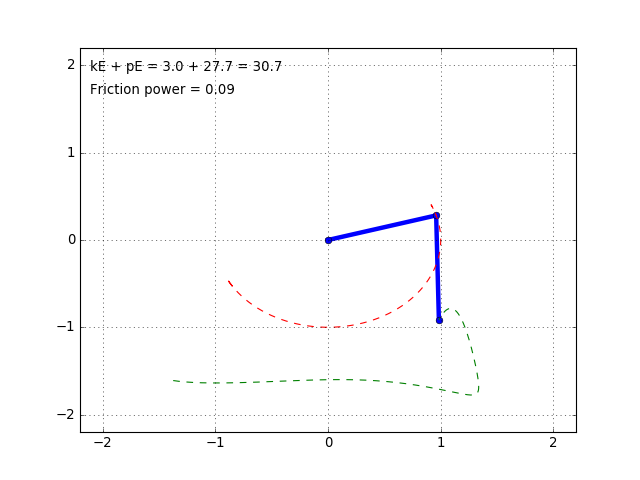

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
%matplotlib nbagg
#%matplotlib inline

## set initial values
t1=np.array([2.5]); t1p=np.array([0]);
t2=np.array([-0.2]); t2p=np.array([0]);
dt = 0.001
r1=1; r2=1.2;
m1=1; m2=1.2;
k1=0.06; k2=0.04; 

def x1(T1):
    global r1
    return r1*np.sin(T1)
def y1(T1):
    global r1
    return -r1*np.cos(T1)
def x2(T1,T2):
    global r2
    return x1(T1)+r2*np.sin(T2)
def y2(T1,T2):
    global r2
    return y1(T1) -r2*np.cos(T2)
def kEng():
    global m1,m2,r1,r2,t1,t2,t1p,t2p
    return float(Tc(m1,m2, r1,r2, t1[-1],t2[-1], t1p[-1],t2p[-1]))
def pEng():
    global m1,m2,t1,t2,g,r1,r2
    return float(Vc(m1,m2, r1,r2, t1[-1], t2[-1], g))
def eDiss(): ## expected energy dissipation rate
    global k1,k2,t1p,t2p
    return float(Rc(k1,k2,t1p[-1],t2p[-1]))

fig = plt.figure()
ax = fig.add_subplot(111, autoscale_on=False, xlim=(-(r1+r2), r1+r2), ylim=(-(r1+r2), r1+r2) )
ax.grid()

line1, = ax.plot([],[],'o-', lw=4)
line2, = ax.plot([],[],'r--', lw=1)
line3, = ax.plot([],[],'g--', lw=1)

#en_template = 'kE + pE = %.1f + %.1f = %.1f'
en_text1 = ax.text(0.02,0.94, '', transform=ax.transAxes)
en_text2 = ax.text(0.02,0.88, '', transform=ax.transAxes)

def init():
    line1.set_data([],[])
    line2.set_data([],[])
    line3.set_data([],[])
    en_text1.set_text('')
    en_text2.set_text('')
    return line1, line2, line3, en_text1, en_text2,

def animate(i):
    ## update t1,t2
    global t1,t2, t1p,t2p, r1,r2, m1,m2, k1,k2, dt
    domA,t1A,t2A,t1pA,t2pA = eulerApprox([0,dt], 2, t1[-1], t1p[-1], t2[-1], t2p[-1],\
                                         r1, r2, m1, m2, k1, k2, "midpt Euler", False)
    t1 = np.append(t1, t1A[-1])
    t2 = np.append(t2, t2A[-1])
    t1p = np.append(t1p, t1pA[-1])
    t2p = np.append(t2p, t2pA[-1])
    ## clear out the list of old values
    if len(t1) > 3000:
        t1p = t1p[-1000:]
        t2p = t2p[-1000:]
        t1 = t1[-1000:]
        t2 = t2[-1000:]
    ## update plot
    line1.set_data( [0,x1(t1[-1]), x2(t1[-1], t2[-1])], [0,y1(t1[-1]), y2(t1[-1],t2[-1])] )
    line2.set_data( x1(t1), y1(t1) )
    line3.set_data( x2(t1,t2), y2(t1, t2))
    E = kEng() + pEng()
        
    en_text1.set_text('kE + pE = %.1f + %.1f = %.1f' % (kEng(), pEng(), E) )
    en_text2.set_text('Friction power = %.2f' % eDiss())
    
    return line1, line2, line3, en_text1, en_text2,

ani = animation.FuncAnimation(fig, animate, init_func=init,
                              interval=1, blit=True)
plt.show()

In [ ]:
print(t1A)